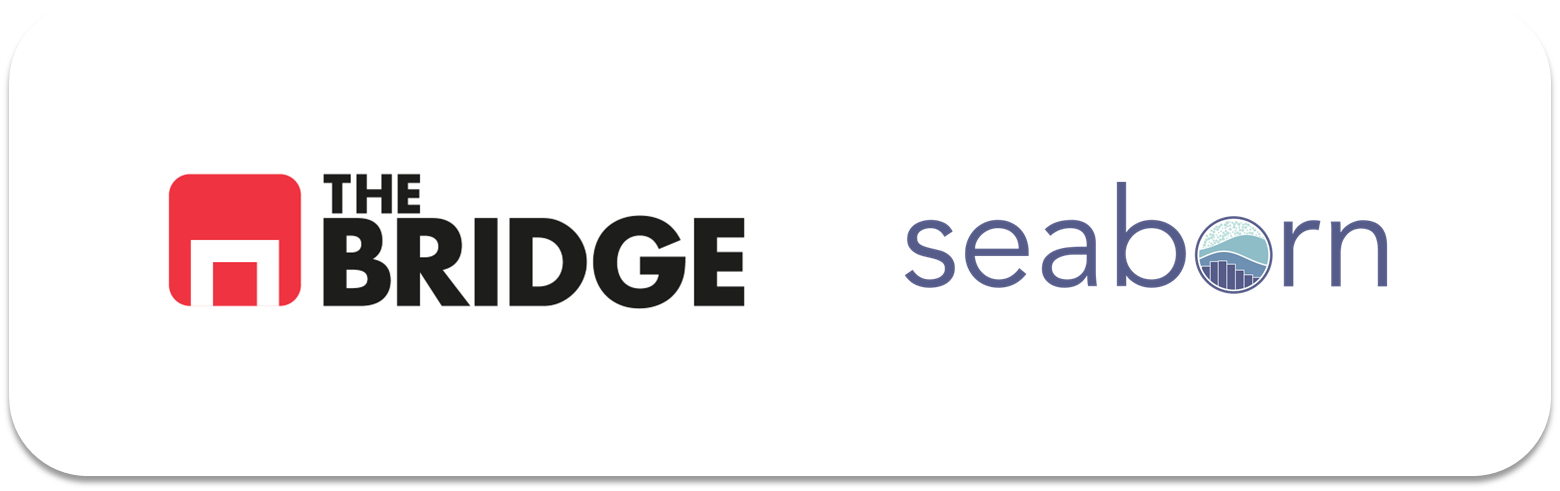

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.copy_on_write = True

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv")
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [ ]:
# Copiado de la practica obligatoria anterior.
ft_nulo = df['elevation_ft'].isna() & df['elevation_m'].notna()
df.loc[ft_nulo, 'elevation_ft'] = df.loc[ft_nulo, 'elevation_m'] * 3.28084
m_nulo = df['elevation_m'].isna() & df['elevation_ft'].notna()
df.loc[m_nulo, 'elevation_m'] = df.loc[m_nulo, 'elevation_ft'] / 3.28084
df['elevation_m'].fillna(df['elevation_m'].median(), inplace=True)
df['elevation_ft'].fillna(df['elevation_ft'].median(), inplace=True)

# total_sq_mi = land + water
total_nulo = df['area_total_sq_mi'].isna() & df['area_land_sq_mi'].notna() & df['area_water_sq_mi'].notna()
df.loc[total_nulo, 'area_total_sq_mi'] = df.loc[total_nulo, 'area_land_sq_mi'] + df.loc[total_nulo, 'area_water_sq_mi']
# water_sq_mi = total - land
water_nulo = df['area_water_sq_mi'].isna() & df['area_total_sq_mi'].notna() & df['area_land_sq_mi'].notna()
df.loc[water_nulo, 'area_water_sq_mi'] = df.loc[water_nulo, 'area_total_sq_mi'] - df.loc[water_nulo, 'area_land_sq_mi']

# total km2 from sq_mi
total_km_nulo = df['area_total_km2'].isna() & df['area_total_sq_mi'].notna()
df.loc[total_km_nulo, 'area_total_km2'] = df.loc[total_km_nulo, 'area_total_sq_mi'] * 2.58999
# land km2
land_km_nulo = df['area_land_km2'].isna() & df['area_land_sq_mi'].notna()
df.loc[land_km_nulo, 'area_land_km2'] = df.loc[land_km_nulo, 'area_land_sq_mi'] * 2.58999
# water km2
water_km_nulo = df['area_water_km2'].isna() & df['area_water_sq_mi'].notna()
df.loc[water_km_nulo, 'area_water_km2'] = df.loc[water_km_nulo, 'area_water_sq_mi'] * 2.58999
df['area_water_percent'] = (df['area_water_km2'] / df['area_total_km2']) * 100

print(df.isnull().sum())

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [ ]:
def scatter_california(df, xcol, ycol, catcol=None, size=50, escala=1, legenda_tipo="legend"):
    
    # Procesar tamaños
    if isinstance(size, str):
        sizes = df[size] * escala
    else:
        sizes = size

    
    # Procesar colores
    if catcol is not None:
        # Mapear categorías a números
        df["_cat_codes"] = df[catcol].astype("category").cat.codes
        color_values = df["_cat_codes"]
        cmap = "tab10"
    else:
        color_values = None
        cmap = None

    
    # PLOT
    plt.figure(figsize=(9,6))
    
    scatter = plt.scatter(
        df[xcol],
        df[ycol],
        s=sizes,
        c=color_values,
        cmap=cmap,
        alpha=0.7
    )

    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.title("Diagrama de dispersión")

    
    # LEYENDAS
    if catcol and legenda_tipo == "colorbar":
        cb = plt.colorbar(scatter)
        cb.set_label(catcol)

    if catcol and legenda_tipo == "legend":
        categorias = df[catcol].astype("category").cat.categories
        codigos = df["_cat_codes"].unique()

        handles = [
            plt.Line2D([0],[0], marker="o", linestyle="", 
                       markersize=8, 
                       label=categorias[i],
                       color=plt.cm.tab10(i/len(categorias)))
            for i in codigos
        ]
        plt.legend(handles=handles, title=catcol)

    # Leyenda para tamaños (si size es columna)
    if isinstance(size, str):
        for s in [df[size].quantile(0.25), df[size].median(), df[size].quantile(0.75)]:
            plt.scatter([], [], s=s*escala, color="gray",
                        label=f"{size}: {round(s,2)}")
        plt.legend(title="Tamaño", loc="lower right")

    # Eliminar la columna auxiliar si se creó
    if "_cat_codes" in df.columns:
        df.drop(columns=["_cat_codes"], inplace=True)

    plt.show()

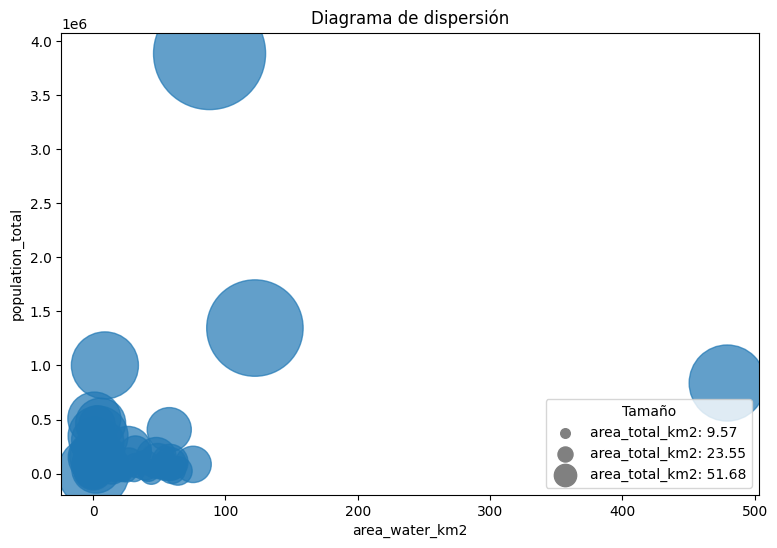

In [12]:
scatter_california(df,
                   xcol="area_water_km2",
                   ycol="population_total",
                   catcol=None,
                   size="area_total_km2",
                   escala=5)

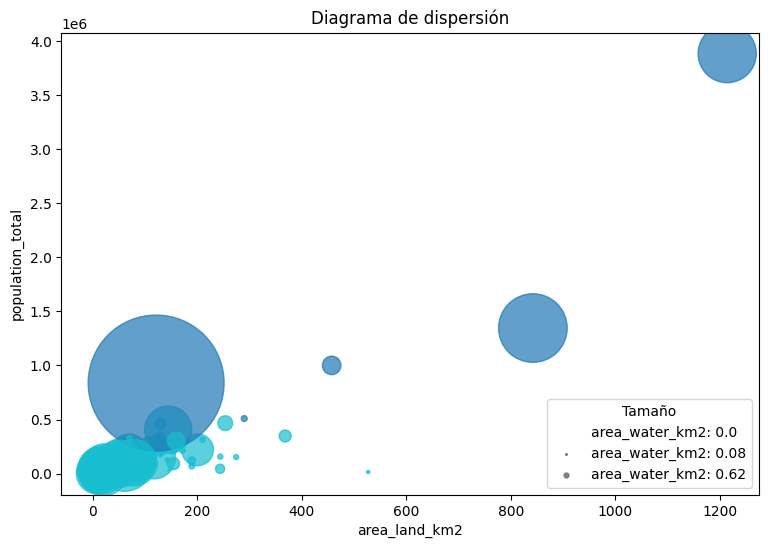

In [13]:
df["big_city"] = df["population_total"].apply(lambda x: "Grande" if x>500000 else "Pequeña")

scatter_california(df,
                   xcol="area_land_km2",
                   ycol="population_total",
                   catcol="big_city",
                   size="area_water_km2",
                   escala=20)

c:\Users\rukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\Users\rukas\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


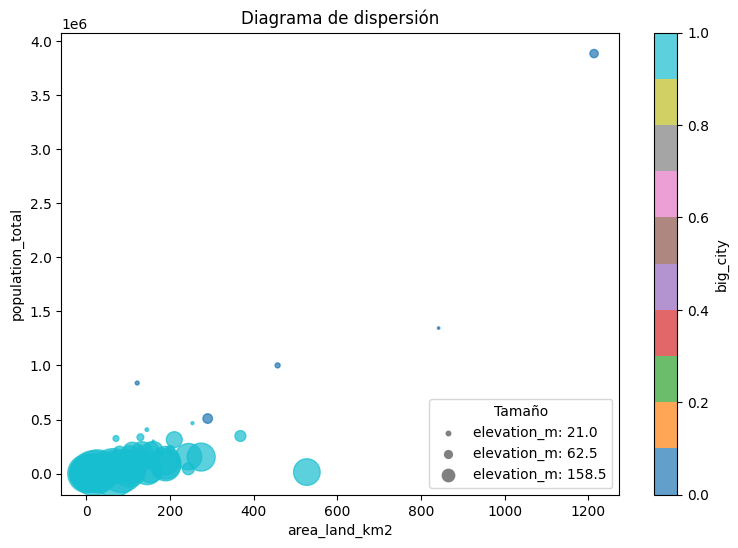

In [14]:
scatter_california(df,
                   xcol="area_land_km2",
                   ycol="population_total",
                   catcol="big_city",
                   size="elevation_m",
                   escala=0.5,
                   legenda_tipo="colorbar")

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

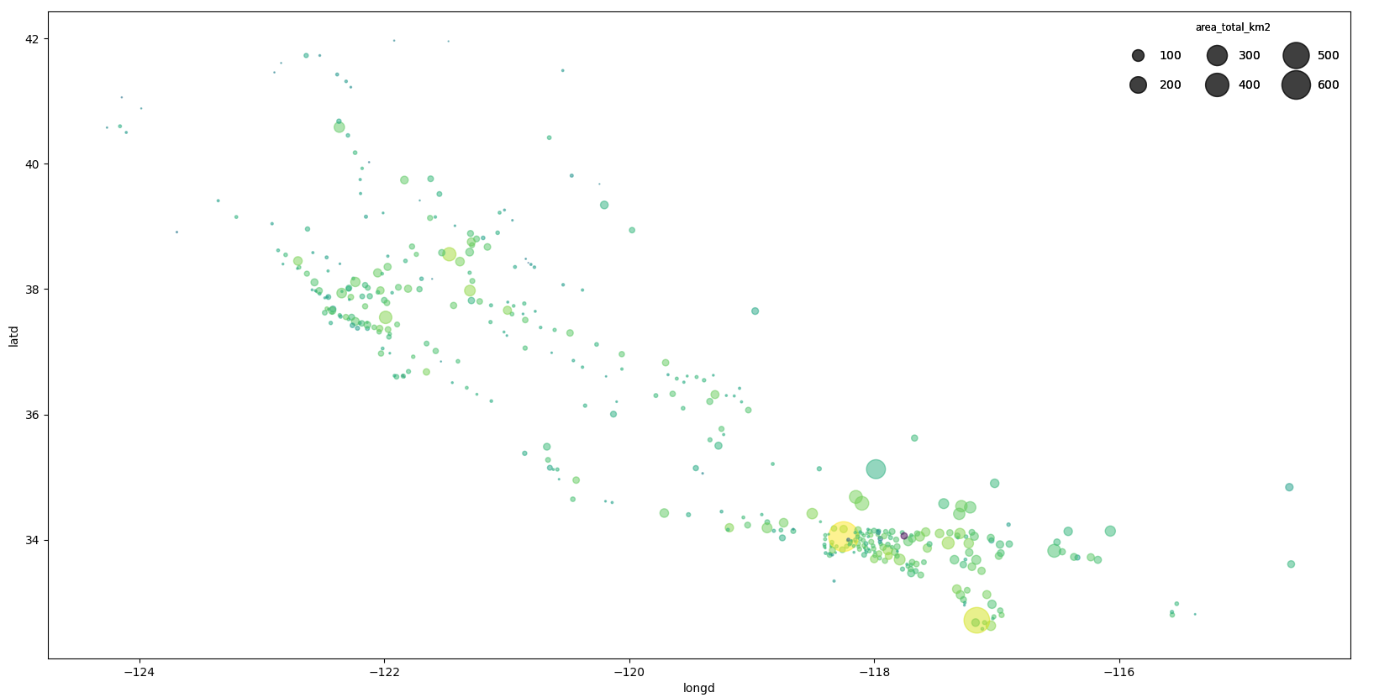

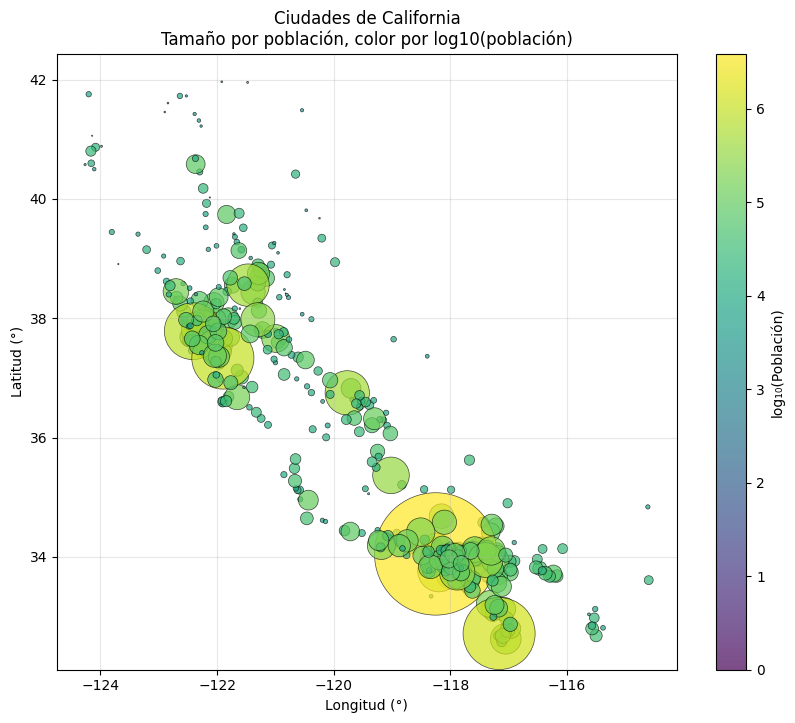

In [3]:
df["log_poblacion"] = np.log10(df["population_total"])

escala_tamano = 0.002   
tamanos = df["population_total"] * escala_tamano

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df["longd"],
    df["latd"],
    s=tamanos,
    c=df["log_poblacion"],
    cmap="viridis",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5
)

cbar = plt.colorbar(scatter)
cbar.set_label("log₁₀(Población)")

plt.xlabel("Longitud (°)")
plt.ylabel("Latitud (°)")
plt.title("Ciudades de California\nTamaño por población, color por log10(población)")

plt.grid(alpha=0.3)
plt.show()

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [ ]:
# Perdón esta semana voy fatal de tiempo y no me da tiempo a terminar este ejercicio. Lo subo para ir a la clase de hoy y la semana que viene lo termino.